# HW 2
## CS486 - Ethical and Trustworthy AI Fall 2025
## September 26, 2025
## Smrithi Panuganti (spanuganti@dons.usfca.edu)

## Audit of Original Data

In [ ]:
import pandas as pd                 # data manipulation
import numpy as np                  # numerical operations
import matplotlib.pyplot as plt     # basic plotting
import seaborn as sns               # statistical viz
# Import necessary modules from scikit-learn for model building and evaluation
from sklearn.model_selection import train_test_split, cross_val_predict, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

sns.set(color_codes=True)           # allow for use of shorthand color codes

In [ ]:
# Import necessary libraries for Google Drive interaction and file path manipulation
from google.colab import drive
import os

# Mount Google Drive to access files
drive.mount('/content/drive', force_remount=True)

# Define the project folder path on Google Drive
project_folder = "/content/drive/My Drive/EthicalAI"

Mounted at /content/drive


In [ ]:
# Construct the full file path to the dataset
file_path = os.path.join(project_folder, "Original training DB e1 positive.csv")

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

## Audit of Original Data

In [ ]:
print(df.shape)
df.head(5)

(871, 609)


,GABRG2,CELF4,SRRM4,SLC1A3,ATP1A3,RBFOX3,GABRA4,NHSL1,GRAMD3,SEZ6L2,...,FERMT1,CSPG4,GJA1,LAMA1,YAP1,LINC00639.2,SMOC1,LINC00498,GFRA1,Label
0,35.038262,161.176004,68.074337,58.063405,20.021864,269.294069,188.205520,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,1.001093,0.0,0.0,1
1,95.324867,75.256474,87.297510,0.000000,18.061554,342.166102,683.328784,0.000000,0.0,1.003420,...,0.0,0.0,0.0,0.0,0.0,0.000000,1.003420,0.0,0.0,1
2,220.143867,187.976727,42.219372,106.553653,0.000000,187.976727,299.556496,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,7.036562,0.000000,0.0,0.0,1
3,166.010840,26.159284,61.373704,0.000000,30.183789,254.549955,446.720079,0.000000,0.0,25.153158,...,0.0,0.0,0.0,0.0,0.0,0.000000,1.006126,0.0,0.0,1
4,188.426220,71.160966,119.269788,57.129226,16.036274,265.600789,287.650666,24.054411,0.0,1.002267,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,1


In [ ]:
# Assign the DataFrame to a variable named data
data = df

# Print the shape of the data (number of rows and columns)
print("Data shape:", data.shape)
# Print the number of columns
print("Columns:", len(data.columns))
# Print descriptive statistics of the data
print(data.describe())
# Print the counts of each unique value in the "Label" column
print(data["Label"].value_counts())

Data shape: (871, 609)
Columns: 609
            GABRG2        CELF4        SRRM4        SLC1A3       ATP1A3  \
count   871.000000   871.000000   871.000000    871.000000   871.000000   
mean    317.195147   160.794717   188.372969    263.524808    79.262833   
std     378.241239   189.064895   208.232294    999.259112   127.012517   
min       0.000000     0.000000     0.000000      0.000000     0.000000   
25%      38.894340    32.084673    35.094833      0.000000     4.019327   
50%     218.427681   108.811797   130.794368      0.000000    29.073964   
75%     440.087971   218.480061   265.911406      6.031598   100.142130   
max    3435.333490  2011.629811  1704.202638  10950.762140  1293.563390   

            RBFOX3       GABRA4        NHSL1       GRAMD3      SEZ6L2  ...  \
count   871.000000   871.000000   871.000000   871.000000  871.000000  ...   
mean    137.275239   229.995772    52.507171    59.435549   41.151089  ...   
std     264.213953   245.183809   232.926742   291.806

In [ ]:
# Display concise information about the DataFrame, including data types and non-null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 871 entries, 0 to 870
Columns: 609 entries, GABRG2 to Label
dtypes: float64(608), int64(1)
memory usage: 4.0 MB


## Creation of training DB and verification DB

In [ ]:
# Select 1 positive and 1 negative sample randomly for a Verification DB
pos_sample = data[data["Label"] == 1].sample(1, random_state=42)
neg_sample = data[data["Label"] == 0].sample(1, random_state=42)
verification_db = pd.concat([pos_sample, neg_sample])

# Remove the selected samples from the original data to create the Training DB
train_db = data.drop(verification_db.index)

# Print the shapes of the Training and Verification DataFrames
print("Training DB shape:", train_db.shape)
print("Verification DB shape:", verification_db.shape)

# Separate features (X) and labels (y) for the Training DB
X = train_db.drop("Label", axis=1)
y = train_db["Label"]

# Display the Training DB
print("Training DB describe: \n")
train_db

Training DB shape: (869, 609)
Verification DB shape: (2, 609)
Training DB describe: 



,GABRG2,CELF4,SRRM4,SLC1A3,ATP1A3,RBFOX3,GABRA4,NHSL1,GRAMD3,SEZ6L2,...,FERMT1,CSPG4,GJA1,LAMA1,YAP1,LINC00639.2,SMOC1,LINC00498,GFRA1,Label
0,35.038262,161.176004,68.074337,58.063405,20.021864,269.294069,188.205520,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,1.001093,0.0,0.0,1
1,95.324867,75.256474,87.297510,0.000000,18.061554,342.166102,683.328784,0.000000,0.0,1.003420,...,0.0,0.0,0.0,0.0,0.0,0.000000,1.003420,0.0,0.0,1
2,220.143867,187.976727,42.219372,106.553653,0.000000,187.976727,299.556496,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,7.036562,0.000000,0.0,0.0,1
3,166.010840,26.159284,61.373704,0.000000,30.183789,254.549955,446.720079,0.000000,0.0,25.153158,...,0.0,0.0,0.0,0.0,0.0,0.000000,1.006126,0.0,0.0,1
4,188.426220,71.160966,119.269788,57.129226,16.036274,265.600789,287.650666,24.054411,0.0,1.002267,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
866,665.606813,101.002551,4.040102,0.000000,95.952424,10.100255,79.792016,0.000000,0.0,192.914873,...,0.0,0.0,0.0,0.0,0.0,0.000000,1.010026,0.0,0.0,0
867,21.157688,45.337903,18.135161,1.007509,290.162582,14.105125,0.000000,3.022527,0.0,64.480574,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0
868,4.111466,81.201453,1704.202638,2.055733,9.250798,75.034254,238.465025,1.027866,0.0,1.027866,...,0.0,0.0,0.0,0.0,0.0,1.027866,0.000000,0.0,0.0,0
869,37.480576,438.624037,0.000000,0.000000,69.896209,3.038966,66.857244,0.000000,0.0,130.675522,...,0.0,0.0,0.0,0.0,0.0,0.000000,252.234146,0.0,0.0,0


In [ ]:
# Display the Verification DB
print("Verification DB describe: \n")
verification_db

Verification DB describe: 



,GABRG2,CELF4,SRRM4,SLC1A3,ATP1A3,RBFOX3,GABRA4,NHSL1,GRAMD3,SEZ6L2,...,FERMT1,CSPG4,GJA1,LAMA1,YAP1,LINC00639.2,SMOC1,LINC00498,GFRA1,Label
281,126.110473,210.184121,509.446275,11.009644,5.004384,327.286703,84.073649,0.0,0.0,20.017535,...,0.0,0.0,0.0,1.000877,0.0,0.0,0.0,0.0,5.004384,1
811,2158.980386,146.903874,221.875507,0.000000,83.076674,54.709029,264.426974,0.0,0.0,9.118172,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0


Label
0    572
1    299
Name: count, dtype: int64
Class distribution (%):
Label
0    65.671642
1    34.328358
Name: count, dtype: float64


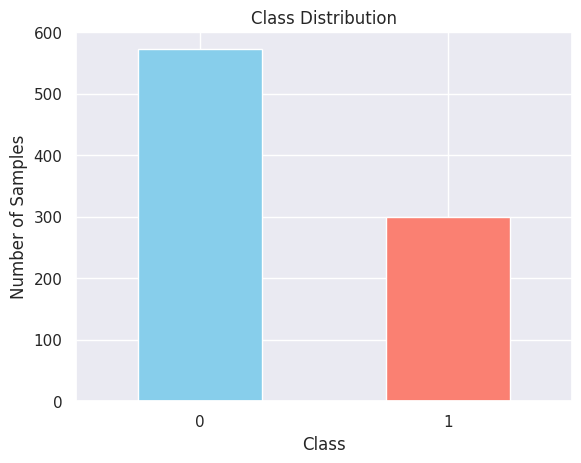

In [ ]:
# Get the counts of each class in the "Label" column
class_counts = data["Label"].value_counts()
# Print the class counts
print(class_counts)

# Calculate and print the relative proportion of each class
print("Class distribution (%):")
print(class_counts / len(data) * 100)

# Plot the class distribution as a bar plot
class_counts.plot(kind="bar", color=["skyblue", "salmon"])
# Add title and labels to the plot
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Number of Samples")
plt.xticks(rotation=0)
# Display the plot
plt.show()

## Experimental Methods and Setup

In [ ]:
# Define the hyperparameter grid for the Random Forest model
param_grid = {
    "n_estimators": [500, 1000, 2000],  # Number of trees in the forest
    "max_features": ["sqrt", "log2", 0.2, 0.5]  # Number of features to consider when looking for the best split
}
# Print the hyperparameter grid
print(param_grid)

{'n_estimators': [500, 1000, 2000], 'max_features': ['sqrt', 'log2', 0.2, 0.5]}


## Actual Results of RF Training and Accuracy Estimates

Best Parameters: {'n_estimators': 1000, 'max_features': 'sqrt'}
Best Cross-Validation Accuracy (3-fold): 0.99540
Confusion Matrix:
 [[568   3]
 [  1 297]]
Accuracy: 0.99540
Precision: 0.99000
Recall: 0.99664
F1 Score: 0.99331


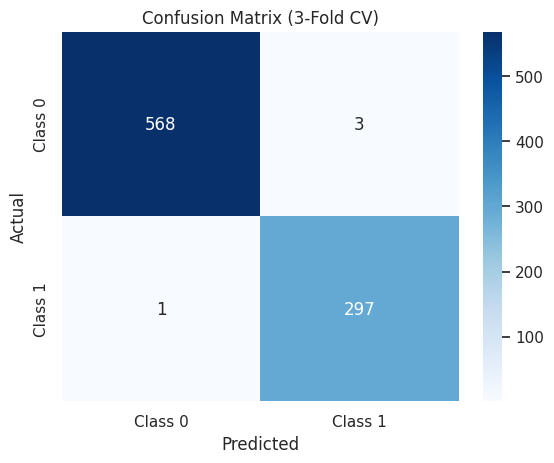

In [ ]:
# Initialize StratifiedKFold for cross-validation, ensuring folds have similar class distribution
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Initialize variables to store the best model, score, and parameters
rf_model = None
score = 0
params = {}

# Iterate through hyperparameter combinations
for n in param_grid["n_estimators"]:
    for m in param_grid["max_features"]:
        # Initialize a Random Forest Classifier with current hyperparameters
        rf = RandomForestClassifier(n_estimators=n, max_features=m, random_state=42, n_jobs=-1)
        # Perform cross-validation and get predicted labels
        preds = cross_val_predict(rf, X, y, cv=skf)
        # Calculate accuracy
        acc = accuracy_score(y, preds)
        # Check if current accuracy is better than the best found so far
        if acc > score:
            # Update best score, model, and parameters
            score = acc
            rf_model = rf
            params = {"n_estimators": n, "max_features": m}

# Print the best hyperparameters and the corresponding cross-validation accuracy
print("Best Parameters:", params)
print("Best Cross-Validation Accuracy (3-fold):", f"{score:.5f}")

# Retrain the best model on the full training data
rf_model.fit(X, y)

# Evaluate the retrained model with cross-validation for detailed metrics
y_pred = cross_val_predict(rf_model, X, y, cv=skf)

# Calculate various evaluation metrics
cm = confusion_matrix(y, y_pred)
acc = accuracy_score(y, y_pred)
prec = precision_score(y, y_pred)
rec = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)

# Print the evaluation metrics
print("Confusion Matrix:\n", cm)
print(f"Accuracy: {acc:.5f}")
print(f"Precision: {prec:.5f}")
print(f"Recall: {rec:.5f}")
print(f"F1 Score: {f1:.5f}")

# Plot the confusion matrix using a heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0","Class 1"], yticklabels=["Class 0","Class 1"])
# Add title and labels to the plot
plt.title("Confusion Matrix (3-Fold CV)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
# Display the plot
plt.show()

## Feature Ranking

Top 10 Features:
TESPA1       0.060184
SLC17A7      0.049604
LINC00507    0.040690
KCNIP1       0.035660
ANKRD33B     0.035167
SFTA1P       0.030523
LINC00508    0.029156
LINC00152    0.027348
TBR1         0.026141
NPTX1        0.025185
dtype: float64


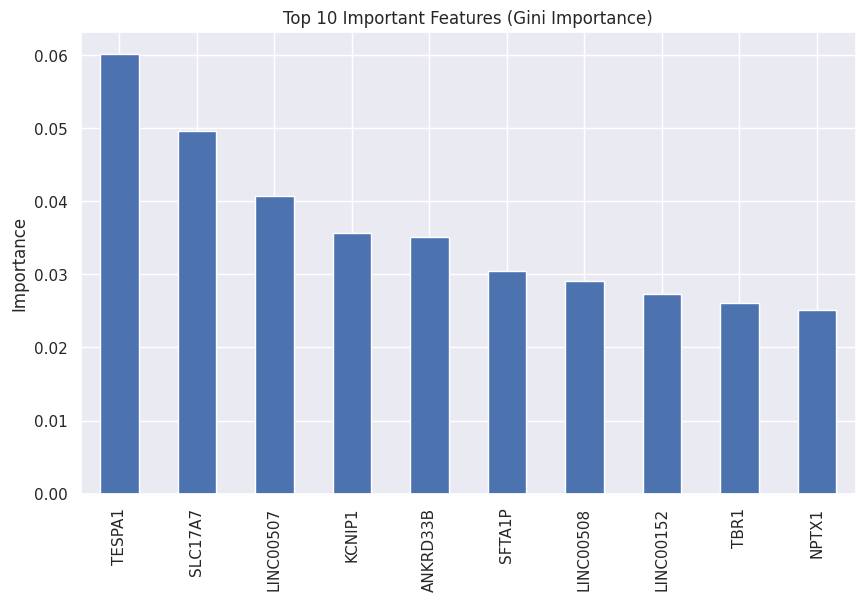

In [ ]:
# Calculate feature importances from the trained Random Forest model
importances = pd.Series(rf_model.feature_importances_, index=X.columns)
# Get the top 10 most important features
top10 = importances.sort_values(ascending=False).head(10)

# Print the top 10 features and their importances
print("Top 10 Features:")
print(top10)

# Create a figure for the plot
plt.figure(figsize=(10,6))
# Plot the top 10 feature importances as a bar plot
top10.plot(kind="bar")
# Add title and labels to the plot
plt.title("Top 10 Important Features (Gini Importance)")
plt.ylabel("Importance")
# Display the plot
plt.show()

## RF Run Time test

In [ ]:
# Separate features (X) and labels (y) for the Verification DB
X_ver = verification_db.drop("Label", axis=1)
y_ver = verification_db["Label"]

# Make predictions on the Verification DB using the trained model
ver_preds = rf_model.predict(X_ver)
# Get the probability estimates for each class on the Verification DB
ver_probs = rf_model.predict_proba(X_ver)

# Create a DataFrame to display the verification results
results = pd.DataFrame({
    "True Label": y_ver.values,
    "Predicted Label": ver_preds,
    "Probability Class 0": ver_probs[:,0],
    "Probability Class 1": ver_probs[:,1]
})

# Print the verification results
print("Verification Results:")
print(results)

Verification Results:
   True Label  Predicted Label  Probability Class 0  Probability Class 1
0           1                1                0.001                0.999
1           0                0                0.983                0.017
